# Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Attribute Information
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict.

Name / Data Type / Measurement Unit / Description -----------------------------. Sex / nominal / -- / M, F, and I (infant) Length / continuous / mm / Longest shell measurement Diameter / continuous / mm / perpendicular to length Height / continuous / mm / with meat in shell Whole weight / continuous / grams / whole abalone Shucked weight / continuous / grams / weight of meat Viscera weight / continuous / grams / gut weight (after bleeding) Shell weight / continuous / grams / after being dried Rings / integer / -- / +1.5 gives the age in years.

You have to predict the rings of each abalone which will lead us to the age of that abalone.

->Imporing Necessaries libraries: Numpy, pandas, matplotlib & seaborn.

->Importing Machine learning Algorrithm : Linear Regression, Decision Tree Regressor,Randomforest regressor, SVM reg.

->Importing Label encoder libraries as well as standard scaler libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
data = pd.read_csv('abalone.csv')
df=pd.DataFrame(data)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

Total rows = 4177 & colums = 9

Creating new pandas Dataframe = df

The Dataset has total 9 Variables where ring is the target or dependent variable
Most of the values of independent variables are continous (float & integer)


In [4]:
#data statistics
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no null or missing values and 7 float vbariables with Target variable(rings) is int variable.

since dataset values are not comlex, box plot is to used for studing further.

In [7]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

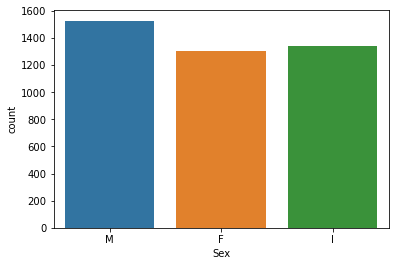

In [8]:
sns.countplot(df['Sex']);

# Label Encoder

In [9]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Male is Label Encoded with 2 Number. 

Female is Label Encoded with 0 Number.
 
Infant is Label Encoded with 1 Number.

In [10]:
# Check the spaces in varaibles name
df.columns 

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

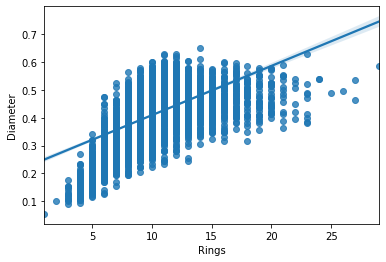

In [11]:
sns.regplot(x="Rings",y="Diameter",data=df)

There is linear relationship seen between diameter & Target Variable rings and best fit linear relationship line is seen

<AxesSubplot:xlabel='Rings', ylabel='Height'>

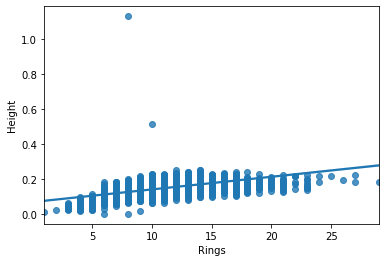

In [12]:
sns.regplot(x="Rings",y="Height",data=df)

There is a linear relationship seen from low to higher value of target column
Best fit linear relationship line can be seen on the plot.

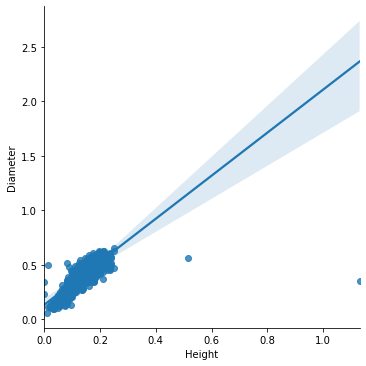

In [13]:
sns.lmplot(x="Height",y="Diameter",data=df)

Lmplot shows most of the data is scatterd under 0.4 of height & and under 1.0 diameter column.
Showing Linear relationship with best fit line can be seen on the plot.

# Skewness Detection

In [14]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Lenght & Diameter are left skewed
Height column is highly positively skewed

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

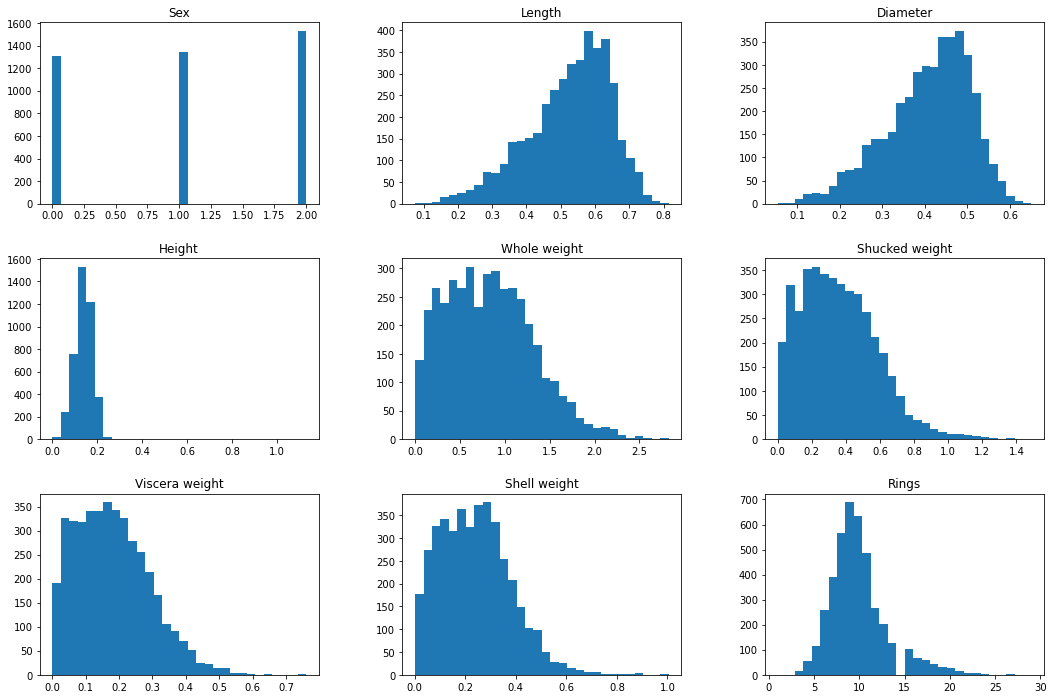

In [15]:
df.hist(grid=False, figsize=(18,12), bins=30)

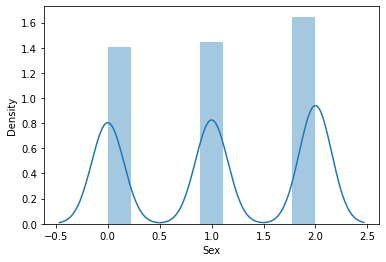

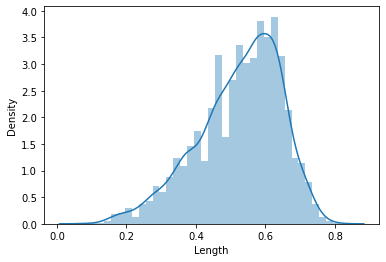

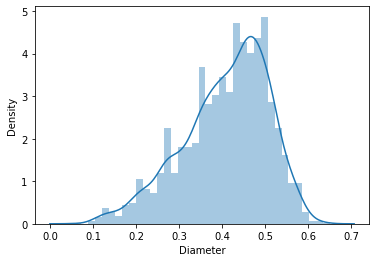

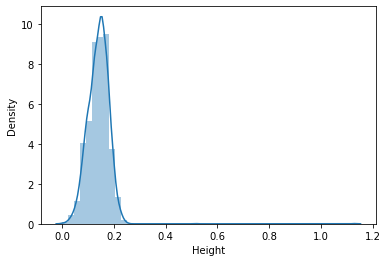

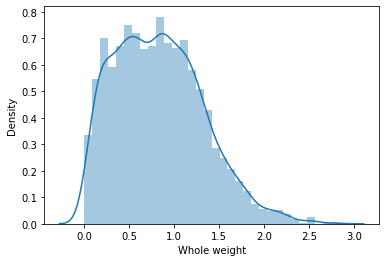

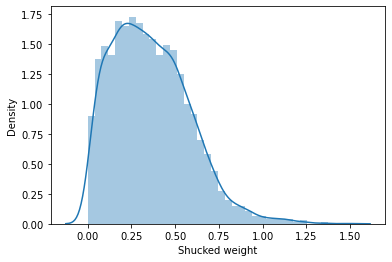

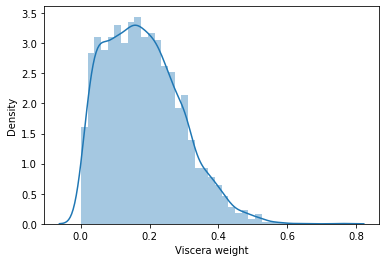

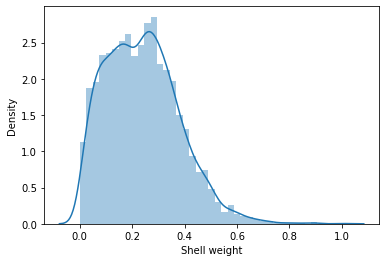

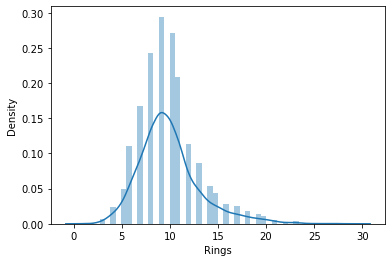

In [16]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

# Boxplot for outlier detection

<AxesSubplot:>

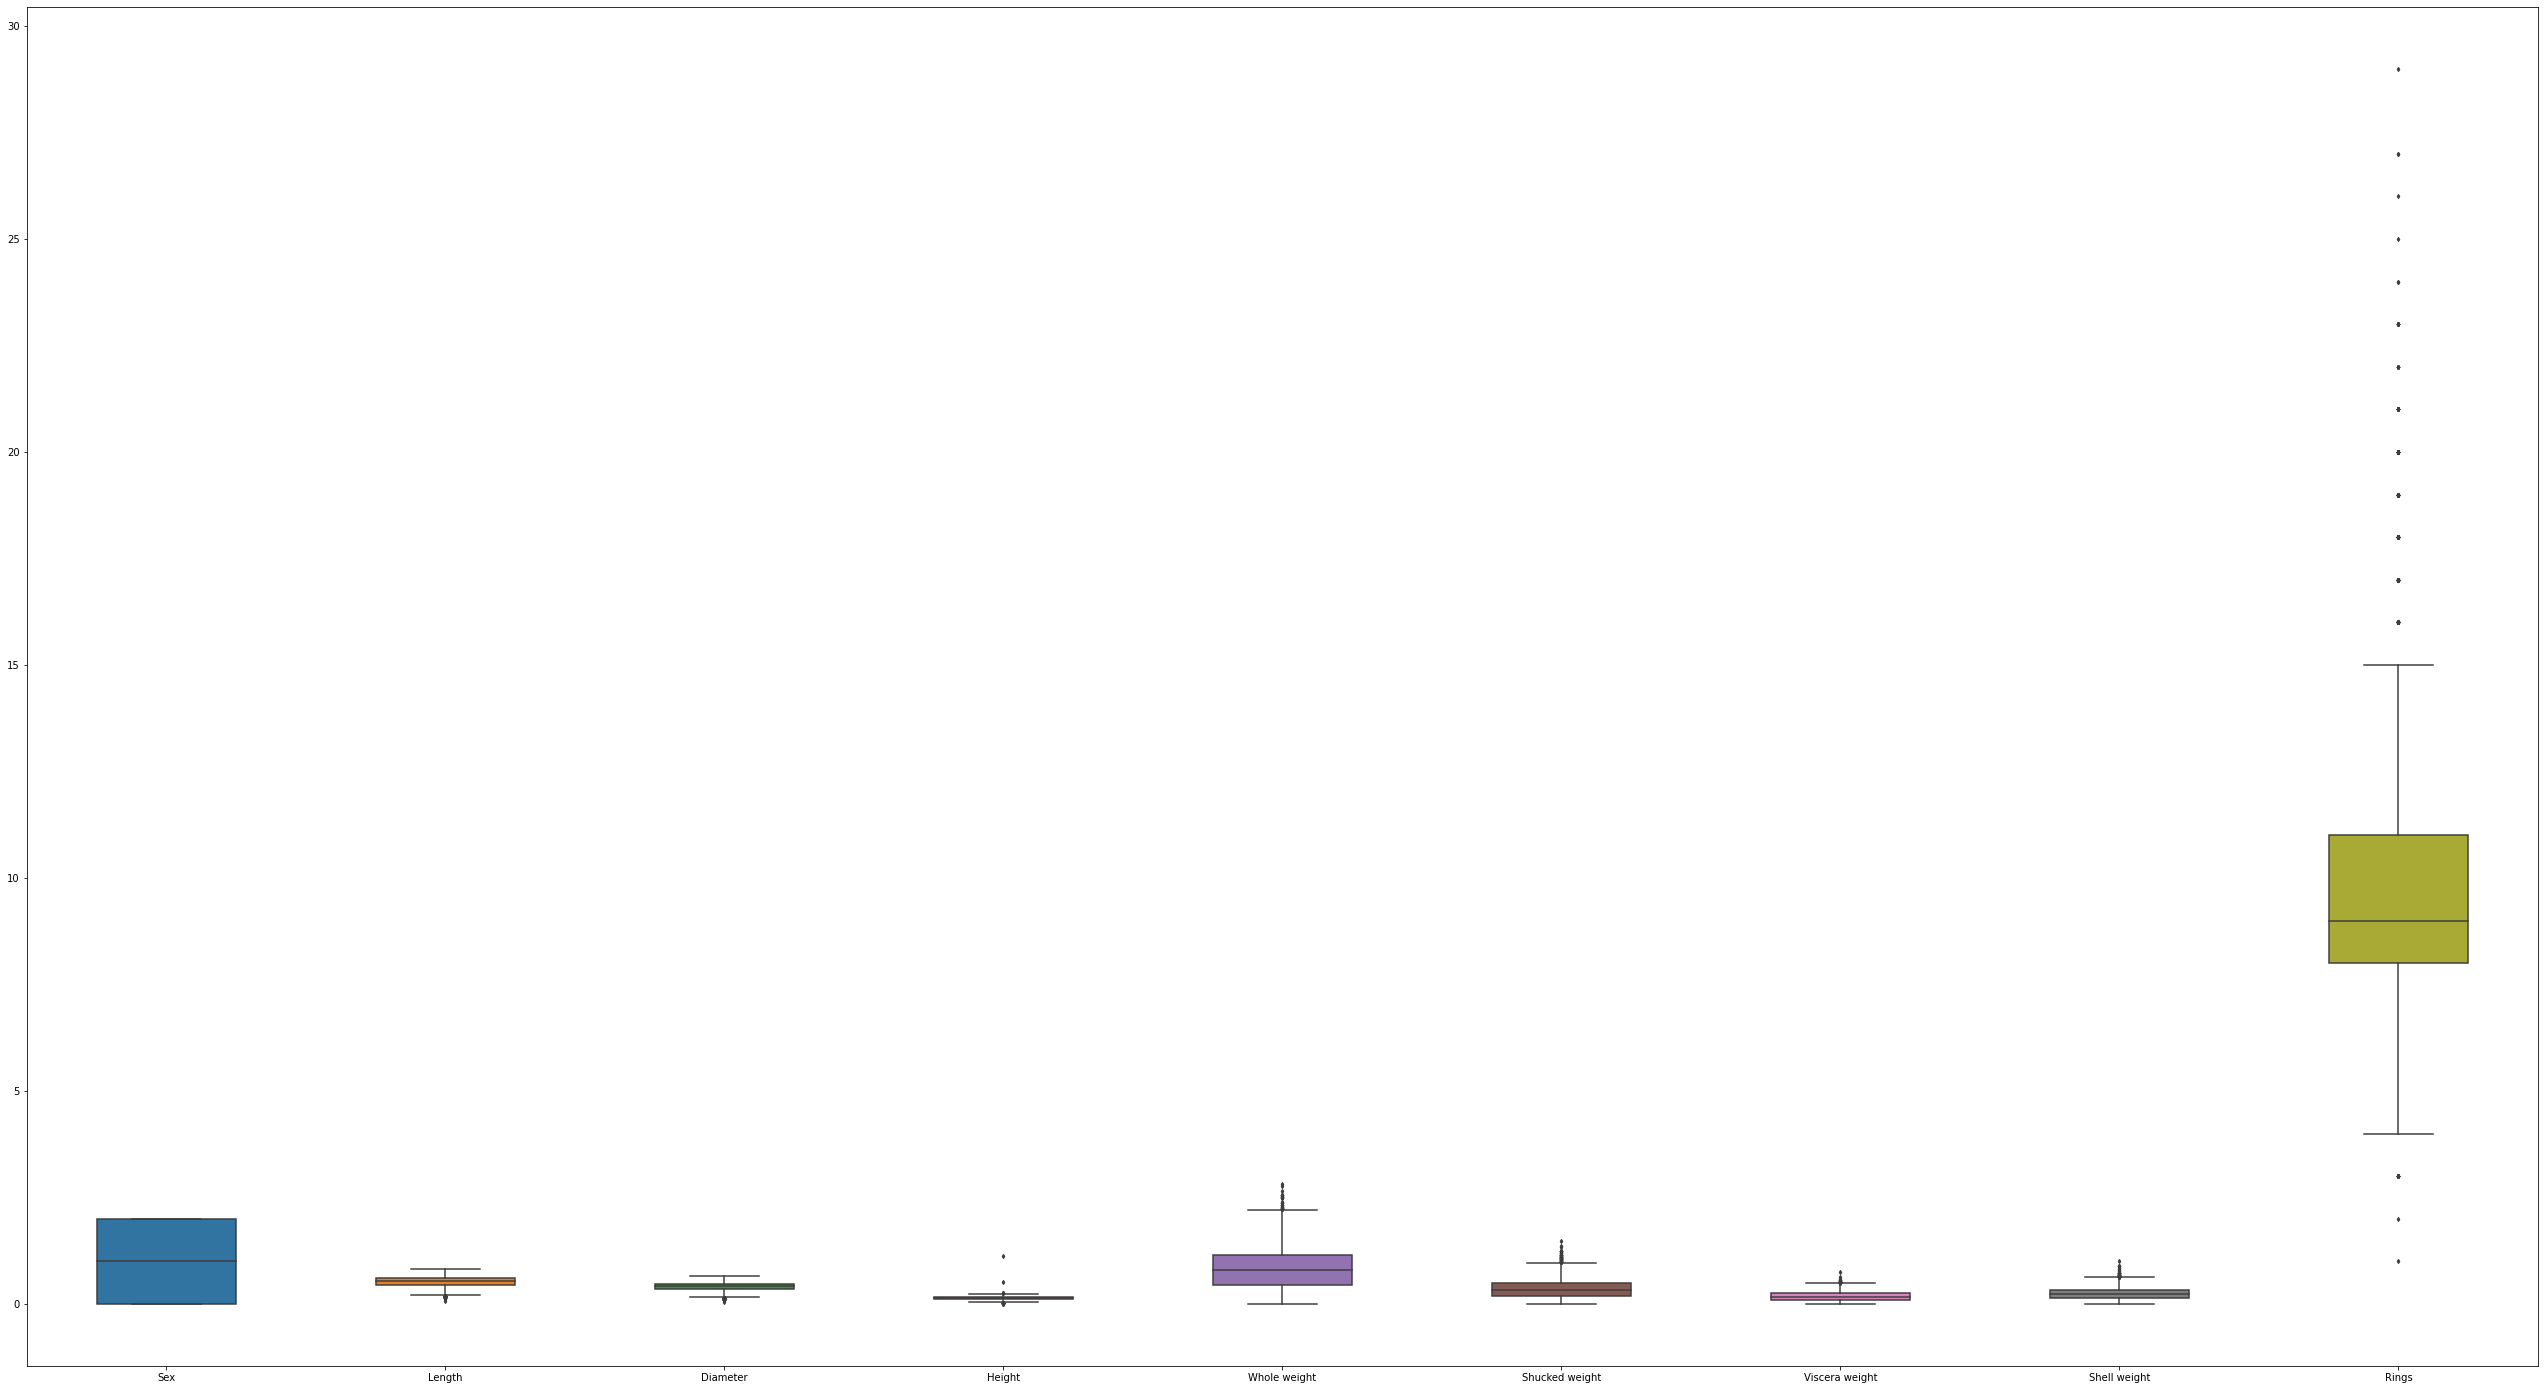

In [17]:
fig, ax =plt.subplots(figsize=(45,25))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

Target Variable has high outlier below low & upper quartile.
Height & Viscera weight has less outliers
Whole weight & Shucked weight has more outliers then height & Viscera weight.

# Correlation & HeatMap

In [18]:
dfcor=df.corr()
dfcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Gender variable is categorical type

length is highly correlated with diameter, height,whole weight, shucked wt, viscera wt, shell wt

diameter is also highly correlated with almost all variables.

Similar relationship of other variable is also seen.

Ring(Target Variable) shows positive correlation with almost all variables.

<AxesSubplot:>

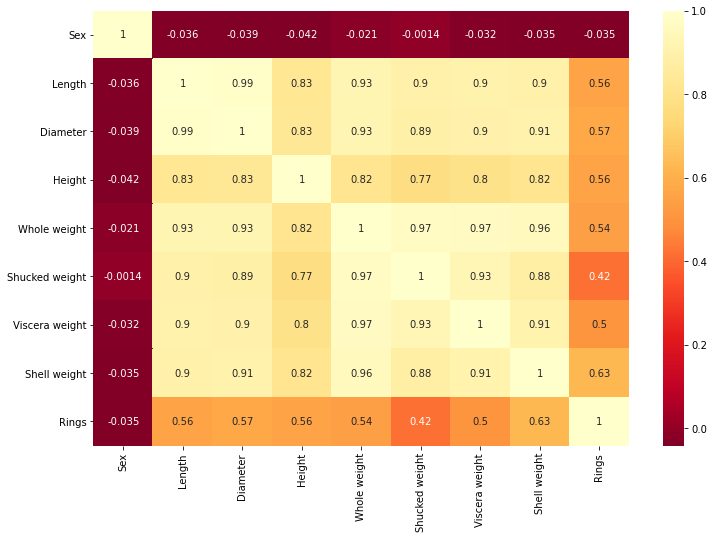

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

# Multicollinearity Check : Variation Inflation Factor

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [22]:
vif_calc()

   VIF Factor        features
0    2.563825             Sex
1  702.347884          Length
2  755.416018        Diameter
3   43.004758          Height
4  436.141083    Whole weight
5  117.686245  Shucked weight
6   64.740171  Viscera weight
7   82.562895    Shell weight
8   21.652131           Rings


length & Diameter has multicollinearity realtionship.
Whole weight & Shucked weight also has multicollinearity relationship

In [23]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

To remove multicollinearity length & Shucked weight are dropped from the diameter.

In [24]:
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


# Removing Skewness

In [25]:
df.skew()

Sex              -0.098155
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [26]:
import numpy as np
df['Height']=np.sqrt(df['Height'])
df.skew()

Sex              -0.098155
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Sqrt Method applied to reduce the skewness of height variable
Other variable skeweness is further removed by power tranform later

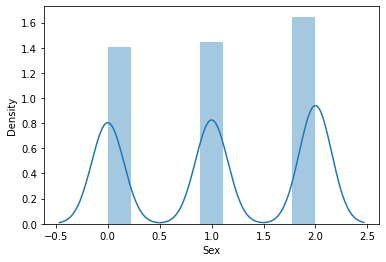

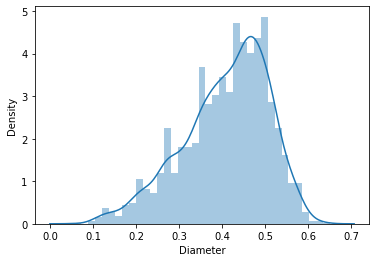

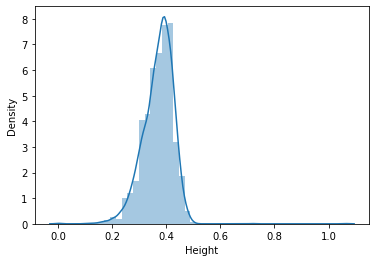

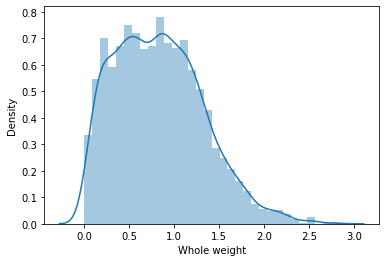

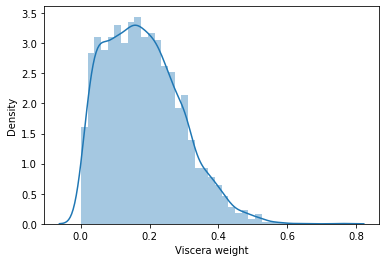

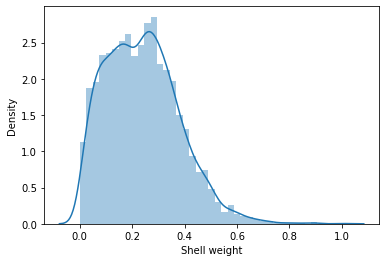

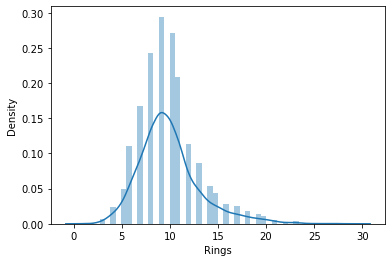

In [27]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

# Removing Outliers with Z- Score

In [28]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  237,  238,  238,
        239,  270,  275,  277,  278,  294,  306,  310,  313,  314,  334,
        351,  355,  358,  358,  362,  375,  416,  417,  428,  431,  433,
        469,  478,  480,  501,  526,  530,  572,  628,  673,  674,  675,
        678,  694,  694,  696,  718,  719,  719,  720,  720,  744,  754,
        756,  811,  891,  891, 1048, 1051, 1052, 1174, 1204, 1206, 1207,
       1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428, 1429, 1429,
       1757, 1759, 1762, 1762, 1763, 1763, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180, 2199,
       2201, 2208, 2209, 2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344,
       2358, 2368, 2381, 2436, 2459, 2471, 2623, 2624, 2624, 2709, 2710,
       2711, 2810, 2811, 2811, 2863, 2863, 3008, 3140, 3148, 3149, 3149,
       3151, 3151, 3188, 3190, 3193, 3280, 3359, 3

In [29]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (4039, 7)


In [30]:
 # Computing outlier percentage
Data_loss=((4177-4039)/4177)*100
Data_loss

3.303806559731865

# Separating dependent and independent variable

In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

-Dividing whole dataset in x & y dataset where y is the target variable

In [32]:
x.shape

(4039, 6)

In [33]:
y.shape

(4039,)

In [34]:
# x varibles without target variable
x.head()

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.150
1,2,0.265,0.300000,0.2255,0.0485,0.070
2,0,0.420,0.367423,0.6770,0.1415,0.210
3,2,0.365,0.353553,0.5160,0.1140,0.155
4,1,0.255,0.282843,0.2050,0.0395,0.055


# Power Transform method applied to remove remaininig positive & negative skeweness.

In [35]:
# Importing power tranform
from sklearn.preprocessing import power_transform

# Applying power transform to whole dataframe
df=power_transform(df,method='yeo-johnson') 
x.skew()

Sex              -0.098440
Diameter         -0.577025
Height           -0.570687
Whole weight      0.391683
Viscera weight    0.459107
Shell weight      0.369555
dtype: float64

Skewness is reduced to great extent for Diameter, Height & for other variable falling with in the range

# Scaling the independent variables

In [36]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[ 1.15550471, -0.43256586, -1.16547822, -0.63881187, -0.728955  ,
        -0.63817671],
       [ 1.15550471, -1.47650319, -1.32432711, -1.26106184, -1.23160309,
        -1.25790001],
       [-1.28543856,  0.14159967, -0.02150106, -0.28724602, -0.3411979 ,
        -0.17338424],
       ...,
       [ 1.15550471,  0.7157652 ,  1.62763892,  0.78901996,  1.05664251,
         0.5857768 ],
       [-1.28543856,  0.82015893,  0.36254185,  0.61323704,  0.8029249 ,
         0.4928183 ],
       [ 1.15550471,  1.55091506,  1.41158391,  2.45518323,  1.90875071,
         2.03438   ]])

# Decision tree classifier

In [37]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

1.9797449362340584 at random_state 0
2.0022505626406604 at random_state 1
2.0345086271567894 at random_state 2
2.1342835708927232 at random_state 3
2.0600150037509377 at random_state 4
1.9752438109527382 at random_state 5
2.09152288072018 at random_state 6
2.105026256564141 at random_state 7
2.0232558139534884 at random_state 8
2.021755438859715 at random_state 9
1.9377344336084021 at random_state 10
2.061515378844711 at random_state 11
1.9954988747186797 at random_state 12
2.085521380345086 at random_state 13
2.0480120030007503 at random_state 14
2.036009002250563 at random_state 15
2.054013503375844 at random_state 16
2.065266316579145 at random_state 17
1.9962490622655664 at random_state 18
2.0960240060015005 at random_state 19
2.0600150037509377 at random_state 20
2.059264816204051 at random_state 21
2.0982745686421604 at random_state 22
2.1462865716429107 at random_state 23
2.1020255063765942 at random_state 24
2.1275318829707426 at random_state 25
2.0690172543135783 at random_sta

# Decision tree is configured to select best random state 

In [38]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  2.1782178217821784  on Random_state  94


# Splitting dataset x train, x test, y train y test

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=94)

In [40]:
print("x-train shape: ", x_train.shape)
print("x-test shape: ", x_test.shape)
print("y-train shape: ", y_train.shape)
print("y-test shape: ", y_test.shape)

x-train shape:  (2827, 6)
x-test shape:  (1212, 6)
y-train shape:  (2827,)
y-test shape:  (1212,)


# Creating ML Algorithm

# 1.  Linear Regression

In [41]:
lm = LinearRegression() 
lm.fit(x_train,y_train)
pred=lm.predict(x_test) 
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) 
lm.score(x_train,y_train)

Mean Absolute error:  1.5614650252015934


0.4551420196903284

Linear Regression Model Score is 45% with MAE = 1.56

# 2. Decision Tree Regression

In [42]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred = DTR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
DTR.score(x_train,y_train)

Mean Absolute error:  2.1765676567656764


1.0

DTR Model Scored 100% with MAE = 2.17

# 3. Random Forest Classifier

In [43]:
RFR = RandomForestRegressor()  
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test) 
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) 
RFR.score(x_train,y_train)

Mean Absolute error:  1.5425412541254124


0.9279754556433738

RFR Model Score is 92% with MAE = 1.54

# 4. Support Vector Regressor

In [44]:
SV = SVR()
SV.fit(x_train, y_train) 
pred = SV.predict(x_test) 
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) 
SV.score(x_train,y_train)

Mean Absolute error:  1.4276880214298673


0.4891545515589656

SVR Model Score is 48% with MAE = 1.42

# Kfold Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [46]:
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p
cross_validation=KFold(5, shuffle =True) 

In [47]:
 # Linear regression
print(cross_val_score(lm,x,y,cv=cross_validation).mean())

0.4525305044091984


In [48]:
 # Decision Tree Regression
print(cross_val_score(DTR,x,y,cv=cross_validation).mean())

0.018519374508698738


In [49]:
 # RandomForestClassifier
print(cross_val_score(RFR,x,y,cv=cross_validation).mean())

0.47203683090260695


In [50]:
 # Support Vector Regressor
print(cross_val_score(SV,x,y,cv=cross_validation).mean())

0.47616209945347165


# Best Model Selection
Diff(MAE-CV)-lm = 1.13

Diff(MAE-CV)-DTR = 2.03

Diff(MAE-CV)-RFR = 1.08

Diff(MAE-CV)-SV = 1.00

SVR Has Least Value = 1.00, so the best model is SVR & applying Hyperparameter on it.

# GridSearch CV

In [51]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'kernel':['linear','rbf'], 'C':[1,2,4,6,8,10], 'gamma': [0.1,0.01, 0.001, 0.0001]}


In [52]:
#Applying Gridsearch to best model random forest classifier
GCV=GridSearchCV(SVR(),parameters,cv=cross_validation)

In [53]:
# Grid search CV applied to the Training Dataset
GCV.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [1, 2, 4, 6, 8, 10],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [54]:
GCV.best_params_

{'C': 6, 'gamma': 0.1, 'kernel': 'rbf'}

These are the best Parameter for SVR we got through GridsearchCV ({'C': 8, 'gamma': 0.1, 'kernel': 'rbf'})

# Best Gridsearch parameter applied to best model

In [55]:
Final_mod = SVR(C = 8, gamma = 0.1, kernel = 'rbf')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

Mean Absolute error:  1.414210390538548


Best MAE = 1.141 which is least among all above

# Exporting Model file with joblib library

In [56]:
#Exporting ML Model as .pkl file with joblib library
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']